In [1]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.utils import resample

In [2]:
%load_ext kedro.ipython

[10/17/25 18:43:30] INFO     Using                                                                  ]8;id=429987;file://c:\Users\nachi\Desktop\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\framework\project\__init__.py\__init__.py]8;;\:]8;id=561250;file://c:\Users\nachi\Desktop\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\framework\project\__init__.py#270\270]8;;\
                             'c:\Users\nachi\Desktop\Rainbow_six_kedro_ml\venv\Lib\site-packages\ke                
                             dro\framework\project\rich_logging.yml' as logging configuration.                     

                    INFO     Registered line magic '%reload_kedro'                                   ]8;id=815855;file://c:\Users\nachi\Desktop\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=27554;file://c:\Users\nachi\Desktop\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\ipython\__init__.py#63\63]8;;\

                    INFO     Registered line magic '%load_node'                                      ]8;id=847289;file://c:\Users\nachi\Desktop\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=742714;file://c:\Users\nachi\Desktop\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\ipython\__init__.py#65\65]8;;\

                    INFO     Resolved project path as:                                              ]8;id=852058;file://c:\Users\nachi\Desktop\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=337434;file://c:\Users\nachi\Desktop\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\ipython\__init__.py#180\180]8;;\
                             c:\Users\nachi\Desktop\Rainbow_six_kedro_ml\proyecto-ml.                              
                             To set a different path, run '%reload_kedro <project_root>'                           

[10/17/25 18:43:32] INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=586640;file://c:\Users\nachi\Desktop\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro_telemetry\plugin.py\plugin.py]8;;\:]8;id=224483;file://c:\Users\nachi\Desktop\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro_telemetry\plugin.py#243\243]8;;\
                             the product. No personal data or IP addresses are stored on our side. To              
                             opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK` environment              
                             variables, or create a `.telemetry` file in the current working                       
                             directory with the contents `consent: false`. To hide this message,                   
                             explicitly grant or deny consent. Read more at                                        
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[10/17/25 18:43:33] INFO     Kedro project proteyecto-ml                                            ]8;id=803290;file://c:\Users\nachi\Desktop\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=10634;file://c:\Users\nachi\Desktop\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\ipython\__init__.py#146\146]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=895748;file://c:\Users\nachi\Desktop\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=625452;file://c:\Users\nachi\Desktop\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\ipython\__init__.py#147\147]8;;\
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        ]8;id=546612;file://c:\Users\nachi\Desktop\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=280915;file://c:\Users\nachi\Desktop\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\ipython\__init__.py#153\153]8;;\

In [3]:
# Cargar datos (ya lo tienes en tu notebook)
data_c3 = catalog.load("data_final")

[10/17/25 18:43:44] INFO     Loading data from data_final (CSVDataset)...                      ]8;id=774542;file://c:\Users\nachi\Desktop\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=481372;file://c:\Users\nachi\Desktop\Rainbow_six_kedro_ml\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

In [4]:
# Preparar características y variable objetivo
X = data_c3[['primaryweapon', 'mapname', 'gamemode', 'winrole',
             'roundduration', 'nbkills', 'isdead']]
y = data_c3['haswon']

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)



In [5]:
# Escalar datos (importante para SVC)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
print("Muestreo de datos para entrenamiento rápido...")
print(f"Tamaño original: {len(X_train_scaled)} muestras")

# Usar 50,000 muestras máximo (ajustable)
n_samples = min(50000, len(X_train_scaled))
X_sample, y_sample = resample(X_train_scaled, y_train, n_samples=n_samples, random_state=17)

print(f"Entrenando con {n_samples} muestras...")
svc_model = SVC(kernel='linear', C=1.0, random_state=17, probability=True)
svc_model.fit(X_sample, y_sample)
print(f"✅ Entrenamiento completado con {n_samples} muestras")

Muestreo de datos para entrenamiento rápido...
Tamaño original: 140611 muestras
Entrenando con 50000 muestras...
✅ Entrenamiento completado con 50000 muestras


In [7]:
#Accuracy del modelo SVC
print('Accuracy of SVC classifier on training set: {:.2f}'
    .format(svc_model.score(X_train_scaled, y_train)))
print('Accuracy of SVC classifier on test set: {:.2f}'
    .format(svc_model.score(X_test_scaled, y_test)))

Accuracy of SVC classifier on training set: 0.73
Accuracy of SVC classifier on test set: 0.73


In [8]:

# realizamos predicciones de los datos de test
y_pred_svc = svc_model.predict(X_test_scaled)
pred_svc = svc_model.predict(X_test_scaled)

Confusion Matrix for SVC:
[[30667  1189]
 [14842 13564]]

Classification Report for SVC:
              precision    recall  f1-score   support

           0       0.67      0.96      0.79     31856
           1       0.92      0.48      0.63     28406

    accuracy                           0.73     60262
   macro avg       0.80      0.72      0.71     60262
weighted avg       0.79      0.73      0.72     60262



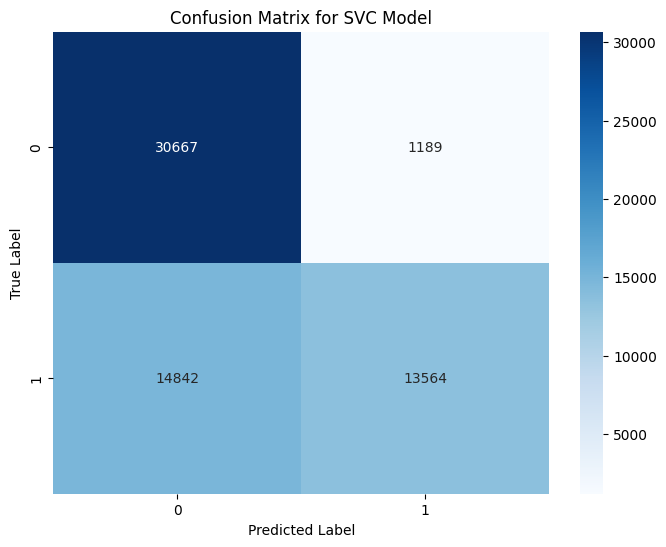

In [9]:
# Métricas del modelo SVC
print("Confusion Matrix for SVC:")
print(confusion_matrix(y_test, pred_svc))
print("\nClassification Report for SVC:")
print(classification_report(y_test, pred_svc))
#Matriz de confusión SVC
plt.figure(figsize=(8, 6))
sb.heatmap(confusion_matrix(y_test, pred_svc), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for SVC Model")
plt.show()

In [10]:
#Sensitivity y Specificity SVC
tn_svc, fp_svc, fn_svc, tp_svc = confusion_matrix(y_test, pred_svc).ravel()

sensitivity_svc = tp_svc / (tp_svc + fn_svc)
specificity_svc = tn_svc / (tn_svc + fp_svc)

print(f"SVC Sensitivity (Recall): {sensitivity_svc:.2f}")
print(f"SVC Specificity: {specificity_svc:.2f}")

SVC Sensitivity (Recall): 0.48
SVC Specificity: 0.96


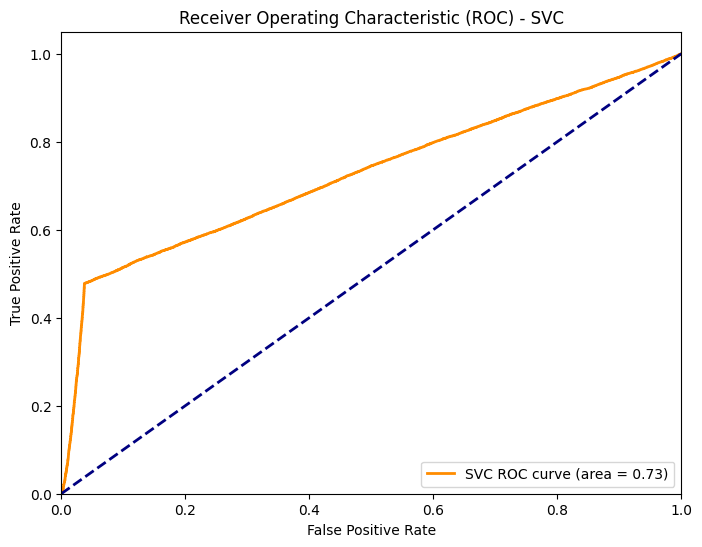

SVC ROC AUC Score: 0.73


In [11]:
# Curva ROC SVC 
y_pred_proba_svc = svc_model.predict_proba(X_test_scaled)[:, 1]

fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, y_pred_proba_svc)
roc_auc_svc = auc(fpr_svc, tpr_svc)

plt.figure(figsize=(8, 6))
plt.plot(fpr_svc, tpr_svc, color='darkorange', lw=2, label=f'SVC ROC curve (area = {roc_auc_svc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - SVC')
plt.legend(loc="lower right")
plt.show()

print(f"SVC ROC AUC Score: {roc_auc_svc:.2f}")

In [ ]:
print("=== RESULTADOS DEL MODELO SVC ===")
print(f"SVC - Training Accuracy: {svc_model.score(X_train_scaled, y_train):.2f}")
print(f"SVC - Test Accuracy: {svc_model.score(X_test_scaled, y_test):.2f}")
print(f"SVC - Sensitivity: {sensitivity_svc:.2f}")
print(f"SVC - Specificity: {specificity_svc:.2f}")
if 'roc_auc_svc' in locals():
    print(f"SVC - ROC AUC: {roc_auc_svc:.2f}") 

=== RESULTADOS DEL MODELO SVC ===
SVC - Training Accuracy: 0.73
SVC - Test Accuracy: 0.73
SVC - Sensitivity: 0.48
SVC - Specificity: 0.96
SVC - ROC AUC: 0.73
